In [1]:
# Import Dependencies
import coremltools
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Load Training and Validation Data
(X_train, y_train), (X_val, y_val) = mnist.load_data()

In [3]:
# Checking Training Data Size
len(X_train), len(y_train)

(60000, 60000)

In [4]:
# Checking Validation Data Size
len(X_val), len(y_val)

(10000, 10000)

In [5]:
# Training Data Shape
print('X_train shape: ', X_train.shape)

X_train shape:  (60000, 28, 28)


In [6]:
# Validation Data Shape
print('X_val shape: ', X_val.shape)

X_val shape:  (10000, 28, 28)


In [7]:
# Number of validation samples
print(X_val.shape[0], 'validation samples')

10000 validation samples


In [8]:
print('First training sample\n', X_train[0])

First training sample
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253

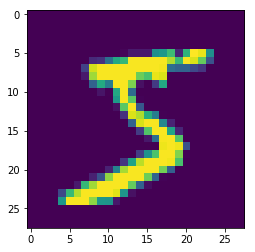

In [9]:
plt.imshow(X_train[0])
plt.show()

In [10]:
# Inspect y data
print('y_train shape: ', y_train.shape)

y_train shape:  (60000,)


In [11]:
# Displays (60000,)
print('First 10 y_train elements:', y_train[:10])

First 10 y_train elements: [5 0 4 1 9 2 1 3 1 4]


In [12]:
# Set Input Output Dimensions
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
num_classes = 10

In [13]:
img_rows, img_cols

(28, 28)

In [14]:
# Set input_shape for channels_first or channels_last
if K.image_data_format() == 'channels_first':  
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:  
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [15]:
# Inspect Input Data Shape
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('input_shape:', input_shape)

X_train shape: (60000, 28, 28, 1)
X_val shape: (10000, 28, 28, 1)
input_shape: (28, 28, 1)


In [16]:
# Convert Data Type and Normalize the Values
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

In [17]:
# Inspect Normalized Data
print('First x sample, normalized\n', X_train[0])

First x sample, normalized
 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.   

In [18]:
# Reshape Label Values
print('y_train shape: ', y_train.shape)
print('First 10 y_train elements:', y_train[:10])
y_train = np_utils.to_categorical(y_train, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
print('New y_train shape: ', y_train.shape)

y_train shape:  (60000,)
First 10 y_train elements: [5 0 4 1 9 2 1 3 1 4]
New y_train shape:  (60000, 10)


In [19]:
print('New y_train shape: ', y_train.shape)
print('First 10 y_train elements, reshaped:\n', y_train[:10])

New y_train shape:  (60000, 10)
First 10 y_train elements, reshaped:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [20]:
# Define Model Architecture
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         8320      
__________

In [21]:
# Callbacks and Checkpoints
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

In [22]:
# Train the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
batch_size = 200
epochs = 10

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s - loss: 0.5536 - acc: 0.8198 - val_loss: 0.1184 - val_acc: 0.9635
Epoch 2/10
60000/60000 [==============================] - 22s - loss: 0.1781 - acc: 0.9442 - val_loss: 0.0796 - val_acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 23s - loss: 0.1307 - acc: 0.9598 - val_loss: 0.0675 - val_acc: 0.9794
Epoch 4/10
60000/60000 [==============================] - 23s - loss: 0.1101 - acc: 0.9652 - val_loss: 0.0501 - val_acc: 0.9840
Epoch 5/10
60000/60000 [==============================] - 23s - loss: 0.0943 - acc: 0.9703 - val_loss: 0.0426 - val_acc: 0.9878
Epoch 6/10
60000/60000 [==============================] - 23s - loss: 0.0833 - acc: 0.9732 - val_loss: 0.0376 - val_acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 24s - loss: 0.0749 - acc: 0.9767 - val_loss: 0.0364 - val_acc: 0.9883
Epoch 8/10
60000/60000 [==============================

In [23]:
# Define Output Class Labels
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [24]:
# Convert Keras Model to CoreML Model
coreml_model = coremltools.converters.keras.convert('best_model.09-0.03.h5', input_names=['image'], output_names=['output'],  class_labels= class_labels, image_input_names='image')

0 : conv2d_1_input, <keras.engine.topology.InputLayer object at 0x1c430a7ef0>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x1c430a7eb8>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x1c42ee9a90>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x1c430bc1d0>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x1c430bcef0>
5 : conv2d_2__activation__, <keras.layers.core.Activation object at 0x1c42ee9940>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0x1c430bcc88>
7 : conv2d_3, <keras.layers.convolutional.Conv2D object at 0x1c36716860>
8 : conv2d_3__activation__, <keras.layers.core.Activation object at 0x1c42ee9eb8>
9 : max_pooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0x1c430d3908>
10 : flatten_1, <keras.layers.core.Flatten object at 0x1c44077be0>
11 : dense_1, <keras.layers.core.Dense object at 0x1c440ae1d0>
12 : dense_1__activation__, <keras.layers.core.Activation object at 0x1c42ee9ba8>
13 : 

In [25]:
spec = coreml_model.get_spec()
spec.description

input {
  name: "image"
  type {
    imageType {
      width: 28
      height: 28
      colorSpace: GRAYSCALE
    }
  }
}
output {
  name: "output"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  type {
    stringType {
    }
  }
}
predictedFeatureName: "classLabel"
predictedProbabilitiesName: "output"

In [27]:
coreml_model.author = 'Anuj Dutt'
coreml_model.license = 'BSD'
coreml_model.short_description = 'Predicts the digit drawn on the screen.'
coreml_model.input_description['image'] = 'Digit image'
coreml_model.output_description['output'] = 'Probability of each digit'
coreml_model.output_description['classLabel'] = 'Labels of digits'

In [28]:
coreml_model.save('MNIST_model.mlmodel')